# Data Exploration and Cleaning

In the previous step, 10-year publication records of 'The journal of neuroscience' was imported and saved as 'jneuro.csv'.
<br>
<br>
<br>
In this step, we need to figure out which columns have the most relevant and relible information about the research contents before proceeding to the analysis step.
<br>
<br>
<br>
Field information:<br>
    -**'pubmed_id'** : unique identifiers of articles archived in PubMed<br>
    -**'title'**<br>
    -**'abstract'**<br>
    -**'keywords'** <br>
    -'journal' : The journal of neuroscience<br>
    -**'publication_date'** <br>
    -'authors' <br>
    -**'methods'**  <br>
    -**'conclusions'** <br>
    -**'results'** <br>
    -'copyrights' <br>
    -'doi' : Digital Object Identifier<br>
    -'xml' 
<br>
<br>
Let's take a look at the data first and decide which column(s) to use finally.
<br>
<br>
<br>
<br>
<br>
<br>

In [5]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(palette='Set2')
sns.set_context(rc={'axes.labelsize':20,
                    'axes.titlesize':25,
                    'font.size':15,
                    'legend.fontsize':15,
                    'lines.linewidth':3})

In [6]:
# Import the csv as a dataframe

columns = ['pubmed_id', 'title', 'abstract', 'keywords',
           'journal','publication_date', 'authors', 'methods',
           'conclusions', 'results', 'copyrights', 'doi', 'xml']


jneuro = pd.read_csv('../data/jneuro.csv', names=columns)

print(jneuro.shape)
jneuro.head()

(12734, 13)


,pubmed_id,title,abstract,keywords,journal,publication_date,authors,methods,conclusions,results,copyrights,doi,xml
0,32737169,"Erratum: Salido and Ramamurthy, ""Proteoglycan ...",NaN,[],The Journal of neuroscience : the official jou...,2020-08-02,[],NaN,NaN,NaN,NaN,10.1523/JNEUROSCI.1846-20.2020,<Element 'PubmedArticle' at 0x7f18e0bb0a10>
1,32737168,"Erratum: Keitel et al., ""Medial Nucleus Accumb...",NaN,[],The Journal of neuroscience : the official jou...,2020-08-02,[],NaN,NaN,NaN,NaN,10.1523/JNEUROSCI.1829-20.2020,<Element 'PubmedArticle' at 0x7f18e07a1050>
2,32737167,The neocortical progenitor specification progr...,Neuronal progenitors in the developing forebra...,[],The Journal of neuroscience : the official jou...,2020-08-02,"[{'lastname': 'Yabut', 'firstname': 'Odessa R'...",NaN,NaN,NaN,Copyright © 2020 the authors.,10.1523/JNEUROSCI.2888-19.2020,<Element 'PubmedArticle' at 0x7f18e07d5b90>
3,32732324,Flexible coordinator and switcher hubs for ada...,Functional connectivity studies have identifie...,[],The Journal of neuroscience : the official jou...,2020-08-01,"[{'lastname': 'Cocuzza', 'firstname': 'Carrisa...",NaN,NaN,NaN,Copyright © 2020 the authors.,10.1523/JNEUROSCI.2559-19.2020,<Element 'PubmedArticle' at 0x7f18e07c2a10>
4,32727820,Responses to Visual Speech in Human Posterior ...,Experimentalists studying multisensory integra...,[],The Journal of neuroscience : the official jou...,2020-07-31,"[{'lastname': 'Metzger', 'firstname': 'Brian A...",NaN,NaN,NaN,Copyright © 2020 Metzger et al.,10.1523/JNEUROSCI.0279-20.2020,<Element 'PubmedArticle' at 0x7f18e07cc710>


In [7]:
jneuro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12734 entries, 0 to 12733
Data columns (total 13 columns):
pubmed_id           12734 non-null object
title               12710 non-null object
abstract            12055 non-null object
keywords            12734 non-null object
journal             12734 non-null object
publication_date    12734 non-null object
authors             12734 non-null object
methods             0 non-null float64
conclusions         0 non-null float64
results             1 non-null object
copyrights          6174 non-null object
doi                 12727 non-null object
xml                 12734 non-null object
dtypes: float64(2), object(11)
memory usage: 1.3+ MB


## Observation

1. The data consists of 13 columns with 12734 rows
2. There is a data type error: 'Publication_date' (object -> datetime) 
3. Null values are represented in two different forms: NaN and [](emtpy list) -> unify the format
4. There are completely empty columns: methods, conclusions, results -> drop columns
5. Some columns are non-null, but less informative about the contents of the paper: journal, copyrights, doi, xml -> drop columns
<br>
<br>
<br>
<br>

## What to do next:
1. Check date types and change it to another form if necessary
2. Take care of (a. uninformative columns), (b. null value)
4. Check data inconsistency
<br>
<br>
<br>
<br>

## 1. Check if data types are correctly assigned

In [8]:
jneuro.dtypes

pubmed_id            object
title                object
abstract             object
keywords             object
journal              object
publication_date     object
authors              object
methods             float64
conclusions         float64
results              object
copyrights           object
doi                  object
xml                  object
dtype: object

## **Observation**:
    1. To analyze annual trend, publication_date should be a 'datetime' format
    2. Methods & Conclusions : These are empty columns. We can drop these two.

### 1.1 Publiction_date as a datetime 

In [9]:
# Before converting dtype of'publication_date'
print(jneuro['publication_date'].dtype)

# Convert the date type to datetime64
jneuro['publication_date'] = pd.to_datetime(jneuro['publication_date'])

# After converting dtype of'publication_date'
print(jneuro['publication_date'].dtype)

object
datetime64[ns]


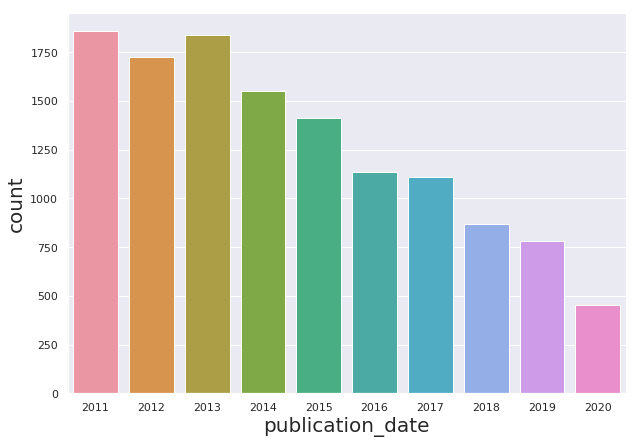

In [10]:
plt.figure(figsize=(10,7))
sns.countplot(jneuro['publication_date'].dt.year)

### Decreased total N of articles
### WHY? : N of articles included in each issue changed (40 in 2011 -> 10 in 2019)
   - In 2014, eNeuro, another SfN journal with complementary scopes was created (https://www.jneurosci.org/content/about-jneurosci)
### But... is this the only reason?
<br>
<br>
<br>

<br>


### 1.2 Drop empty columns: methods, conclusions

In [11]:
jneuro[['methods', 'conclusions']].describe()

,methods,conclusions
count,0.0,0.0
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,NaN,NaN


In [12]:
jneuro_1 = jneuro.drop(columns=['methods', 'conclusions'])

<br>
<br>

## 2.  Take care of empty values

First, we'll drop less informative columns.
And then, we'll take care of null values.

In [13]:
# First, let's use .replace() and substitute ('[]') with np.nan
# To unify the respresentation of empty values

jneuro_1.replace(to_replace='[]', value=np.nan, inplace=True)
jneuro_1.head()

,pubmed_id,title,abstract,keywords,journal,publication_date,authors,results,copyrights,doi,xml
0,32737169,"Erratum: Salido and Ramamurthy, ""Proteoglycan ...",NaN,NaN,The Journal of neuroscience : the official jou...,2020-08-02,NaN,NaN,NaN,10.1523/JNEUROSCI.1846-20.2020,<Element 'PubmedArticle' at 0x7f18e0bb0a10>
1,32737168,"Erratum: Keitel et al., ""Medial Nucleus Accumb...",NaN,NaN,The Journal of neuroscience : the official jou...,2020-08-02,NaN,NaN,NaN,10.1523/JNEUROSCI.1829-20.2020,<Element 'PubmedArticle' at 0x7f18e07a1050>
2,32737167,The neocortical progenitor specification progr...,Neuronal progenitors in the developing forebra...,NaN,The Journal of neuroscience : the official jou...,2020-08-02,"[{'lastname': 'Yabut', 'firstname': 'Odessa R'...",NaN,Copyright © 2020 the authors.,10.1523/JNEUROSCI.2888-19.2020,<Element 'PubmedArticle' at 0x7f18e07d5b90>
3,32732324,Flexible coordinator and switcher hubs for ada...,Functional connectivity studies have identifie...,NaN,The Journal of neuroscience : the official jou...,2020-08-01,"[{'lastname': 'Cocuzza', 'firstname': 'Carrisa...",NaN,Copyright © 2020 the authors.,10.1523/JNEUROSCI.2559-19.2020,<Element 'PubmedArticle' at 0x7f18e07c2a10>
4,32727820,Responses to Visual Speech in Human Posterior ...,Experimentalists studying multisensory integra...,NaN,The Journal of neuroscience : the official jou...,2020-07-31,"[{'lastname': 'Metzger', 'firstname': 'Brian A...",NaN,Copyright © 2020 Metzger et al.,10.1523/JNEUROSCI.0279-20.2020,<Element 'PubmedArticle' at 0x7f18e07cc710>


In [14]:
jneuro_1.isnull().mean()

pubmed_id           0.000000
title               0.001885
abstract            0.053322
keywords            0.487514
journal             0.000000
publication_date    0.000000
authors             0.009895
results             0.999921
copyrights          0.515156
doi                 0.000550
xml                 0.000000
dtype: float64

- Title & Abstract has some null values (0.2% and 5%)
- Keywords column miss almost 50% of its contents
- As discussed ealier, 'results' is empty so it'll be removed along with other irrelevant columns

### 2-1. Drop some less-informative columns

In [15]:
# Drop columns which have high proportion of empty values (>50%)
# and are not necessary information for research trend analysis
# Let's keep the 'keywords' column for now

cols_to_drop = ['results', 'copyrights']
jneuro_1.drop(columns=cols_to_drop, inplace=True)
jneuro_1.isnull().sum()

pubmed_id              0
title                 24
abstract             679
keywords            6208
journal                0
publication_date       0
authors              126
doi                    7
xml                    0
dtype: int64

In [16]:
# Drop more columns which do not provide any info about the contents

more_cols_to_drop = ['journal', 'doi', 'xml']
jneuro_1.drop(columns=more_cols_to_drop, inplace=True)
jneuro_1.isnull().sum()

pubmed_id              0
title                 24
abstract             679
keywords            6208
publication_date       0
authors              126
dtype: int64

### 2-2. Check articles missing title or abstract

Usually, abstracts contain longer length of strings with a lot of keywords compactly sqeezed in it then the titles.

In [17]:
# Let's check the length of titles and abstracts
jneuro_2 = jneuro_1.copy()

# We need these masks to filter NaNs out and calculate the length of only strings
no_titles = jneuro_2['title'].isnull()
no_abstracts = jneuro_2['abstract'].isnull()


jneuro_2['len_title'] = jneuro_2[~no_titles]['title'].apply(lambda t: len(t))
jneuro_2['len_abstract'] = jneuro_2[~no_abstracts]['abstract'].apply(lambda a: len(a))

print(jneuro_2['len_title'].describe())
print('-'*40)
print(jneuro_2['len_abstract'].describe())

count    12710.000000
mean       102.980094
std         32.668527
min          1.000000
25%         80.000000
50%        100.000000
75%        123.000000
max        311.000000
Name: len_title, dtype: float64
----------------------------------------
count    12055.000000
mean      1493.011779
std        527.429549
min          1.000000
25%       1205.000000
50%       1583.000000
75%       1767.000000
max       3582.000000
Name: len_abstract, dtype: float64


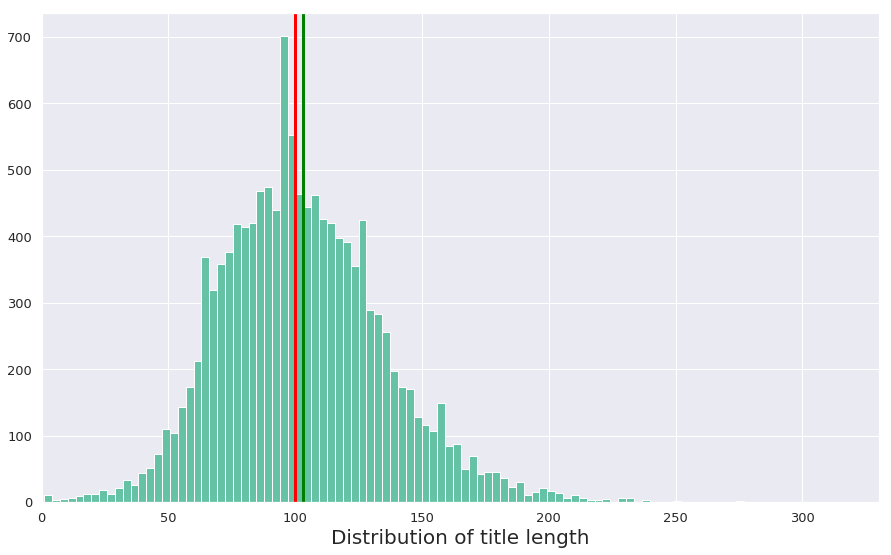

In [18]:
jneuro_2['len_title'].hist(bins=100, figsize=(15, 9), xlabelsize=13, ylabelsize=13)

plt.xlabel("Distribution of title length")
plt.xticks(range(0,330,50))
plt.xlim((0,330))
plt.axvline(jneuro_2['len_title'].median(), color='red')  # Median in red
plt.axvline(jneuro_2['len_title'].mean(), color='green')  # Mean in green

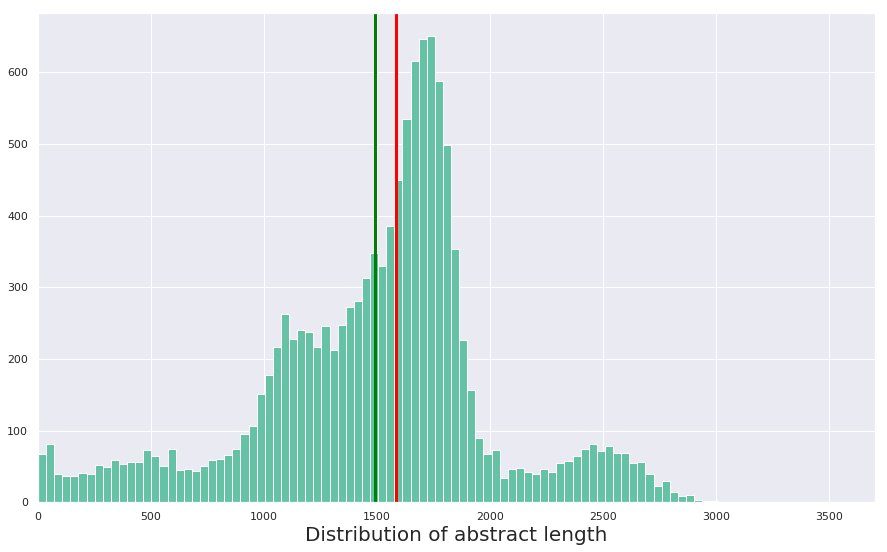

In [19]:
jneuro_2['len_abstract'].hist(bins=100, figsize=(15, 9))

plt.xlabel("Distribution of abstract length")
plt.xticks(range(0,3700,500))
plt.xlim((0,3700))
plt.axvline(jneuro_2['len_abstract'].median(), color='red')  # Median in red
plt.axvline(jneuro_2['len_abstract'].mean(), color='green')  # Mean in green

## Observation:
- Indeed, abstracts contain more words
- I'll keep both titles & abstracts for the analysis. **However, I'd prioritize abstracts to have a richer pool of vocabulary**
- Some data have extremely short length of title and abstract (<5 characters) -> probably we need to look at these separately and deal with them

In [20]:
# Current dataframe looks like:

print(jneuro_2.shape)
jneuro_2[jneuro_2.isnull().any(axis=1)].head()

(12734, 8)


,pubmed_id,title,abstract,keywords,publication_date,authors,len_title,len_abstract
0,32737169,"Erratum: Salido and Ramamurthy, ""Proteoglycan ...",NaN,NaN,2020-08-02,NaN,111.0,NaN
1,32737168,"Erratum: Keitel et al., ""Medial Nucleus Accumb...",NaN,NaN,2020-08-02,NaN,118.0,NaN
2,32737167,The neocortical progenitor specification progr...,Neuronal progenitors in the developing forebra...,NaN,2020-08-02,"[{'lastname': 'Yabut', 'firstname': 'Odessa R'...",117.0,767.0
3,32732324,Flexible coordinator and switcher hubs for ada...,Functional connectivity studies have identifie...,NaN,2020-08-01,"[{'lastname': 'Cocuzza', 'firstname': 'Carrisa...",65.0,1645.0
4,32727820,Responses to Visual Speech in Human Posterior ...,Experimentalists studying multisensory integra...,NaN,2020-07-31,"[{'lastname': 'Metzger', 'firstname': 'Brian A...",103.0,1664.0


In [21]:
# case 1: No title, but abtract exist -> Let's keep the rows for now because we need abstracts.
# case 2: No title, no abstract -> Drop rows.
# case 3: Has title, no abstract -> Drop rows.

# Drop rows missing abstract using the 'no_abstracts' mask
jneuro_2 = jneuro_2[~no_abstracts]

print(jneuro_2.shape)
jneuro_2.head()

(12055, 8)


,pubmed_id,title,abstract,keywords,publication_date,authors,len_title,len_abstract
2,32737167,The neocortical progenitor specification progr...,Neuronal progenitors in the developing forebra...,NaN,2020-08-02,"[{'lastname': 'Yabut', 'firstname': 'Odessa R'...",117.0,767.0
3,32732324,Flexible coordinator and switcher hubs for ada...,Functional connectivity studies have identifie...,NaN,2020-08-01,"[{'lastname': 'Cocuzza', 'firstname': 'Carrisa...",65.0,1645.0
4,32727820,Responses to Visual Speech in Human Posterior ...,Experimentalists studying multisensory integra...,NaN,2020-07-31,"[{'lastname': 'Metzger', 'firstname': 'Brian A...",103.0,1664.0
5,32727819,Activation of Infralimbic to Nucleus Accumbens...,Hedonic processing plays an integral role in d...,NaN,2020-07-31,"[{'lastname': 'Hurley', 'firstname': 'Seth W',...",121.0,1421.0
6,32719163,Hippocampal representation of threat features ...,Decisions under threat are crucial to survival...,NaN,2020-07-29,"[{'lastname': 'Abivardi', 'firstname': 'Aslan'...",111.0,1823.0


In [22]:
jneuro_2.isnull().sum()

pubmed_id              0
title                 19
abstract               0
keywords            5545
publication_date       0
authors               47
len_title             19
len_abstract           0
dtype: int64

- Let's not remove the keywords and authors yet, just in case we need it in the future analysis

# 3. Data inconsistency

In this step, I'll check if there's any critical data inconsistency which affects the data quality.
<br>
Related issues found so far: title, abstract and pubmed_id

## 3-1. Erratum and Corrigendum statetments in title

Some titles starts their sentence with 'Erratum:...' or 'Corrections'
<br>
In this case, these rows have a title, but their abstracts are uninforamative, since it's just informing an erratum about a previously published article.
<br>
Here's are the exmaples:

In [23]:
jneuro_3 = jneuro_2.copy()
jneuro_3[jneuro_3['title'].str.contains(r'Erratum:*', na=False)].head()

,pubmed_id,title,abstract,keywords,publication_date,authors,len_title,len_abstract
786,31329694,"Erratum: Wang et al., ""14-3-3 Proteins Reduce ...",[This corrects the article on p. 8211 in vol. ...,NaN,2019-07-23,NaN,111.0,67.0
787,31329693,"Erratum: Lueckmann et al., ""Can Serial Depende...",[This corrects the article on p. 3495 in vol. ...,NaN,2019-07-23,NaN,113.0,67.0
1827,31329681,"Erratum: Hood et al., ""Endoplasmic Reticulum S...",[This corrects the article on p. 2372 in vol. ...,NaN,2018-04-25,NaN,137.0,67.0
2047,31329691,"Erratum: Wanner et al., Cold-Induced Thermogen...",[This corrects the article on p. 6956 in vol. ...,NaN,2018-01-24,NaN,228.0,67.0
2048,31329690,"Erratum: Machado et al., Conditional Deletion of",[This corrects the article on p. 12202 in vol....,NaN,2018-01-24,NaN,49.0,68.0


In [24]:
jneuro_3[jneuro_3['title'].str.contains(r'Correction*', na=False)].head()

,pubmed_id,title,abstract,keywords,publication_date,authors,len_title,len_abstract
785,31329695,"Correction: Sequerra, Goyal et al., ""NMDA Rece...",[This corrects the article on p. 4762 in vol. ...,NaN,2019-07-23,NaN,167.0,67.0
788,31329692,"Correction: Personius et al., ""Neuromuscular N...",[This corrects the article on p. 8783 in vol. ...,NaN,2019-07-23,NaN,104.0,67.0
789,31329689,"Correction: Scheff and Gold, ""Trafficking of N...",[This corrects the article on p. 8423 in vol. ...,NaN,2019-07-23,NaN,51.0,67.0
790,31329688,"Correction: Marneweck et al., ""Neural Represen...",[This corrects the article on p. 4724 in vol. ...,NaN,2019-07-23,NaN,170.0,67.0
791,31329687,"Correction: Stalnaker et al., ""Cholinergic Int...",[This corrects the article on p. 6242 in vol. ...,NaN,2019-07-23,NaN,118.0,67.0


In [25]:
# We can drop these rows using regular expression: r'Erratum:*' & r'Correction*'
# Create masks for erratum and corrigendum to filter the dataframe
find_erratum = jneuro_3['title'].str.contains(r'Erratum:*', na=False)
find_corrections = jneuro_3['title'].str.contains(r'Correction*', na=False)

# Filtered dataframe
found_erratum = jneuro_3[find_erratum]
found_corrections = jneuro_3[find_corrections]

# Drop the rows contating erratum statement
print(f'Before dropping the erratums: {jneuro_3.shape}')

jneuro_3.drop(index=found_erratum.index, inplace=True)

print(f'After dropping the erratums: {jneuro_3.shape}')

jneuro_3.drop(index=found_corrections.index, inplace=True)

print(f'After dropping the erratums + corrigendums: {jneuro_3.shape}')

jneuro_3.head()

Before dropping the erratums: (12055, 8)
After dropping the erratums: (12046, 8)
After dropping the erratums + corrigendums: (12010, 8)


,pubmed_id,title,abstract,keywords,publication_date,authors,len_title,len_abstract
2,32737167,The neocortical progenitor specification progr...,Neuronal progenitors in the developing forebra...,NaN,2020-08-02,"[{'lastname': 'Yabut', 'firstname': 'Odessa R'...",117.0,767.0
3,32732324,Flexible coordinator and switcher hubs for ada...,Functional connectivity studies have identifie...,NaN,2020-08-01,"[{'lastname': 'Cocuzza', 'firstname': 'Carrisa...",65.0,1645.0
4,32727820,Responses to Visual Speech in Human Posterior ...,Experimentalists studying multisensory integra...,NaN,2020-07-31,"[{'lastname': 'Metzger', 'firstname': 'Brian A...",103.0,1664.0
5,32727819,Activation of Infralimbic to Nucleus Accumbens...,Hedonic processing plays an integral role in d...,NaN,2020-07-31,"[{'lastname': 'Hurley', 'firstname': 'Seth W',...",121.0,1421.0
6,32719163,Hippocampal representation of threat features ...,Decisions under threat are crucial to survival...,NaN,2020-07-29,"[{'lastname': 'Abivardi', 'firstname': 'Aslan'...",111.0,1823.0


## 3-2. There are extremely short (incomplete) titles

In [26]:
# Show titles composed of less than 15 characters
jneuro_3[jneuro_3['len_title'] < 15]['title']

173     Disruption of 
195         Tonic GABA
483              Npas1
530     A Mutation in 
542            The NGF
544         Zebrafish 
755         Dopamine D
771                 Ca
801      Circular RNA 
985                NPY
1167     Presynaptic α
1311                 α
1312        Dopamine D
1383              5-HT
1510     Dorsal BNST α
1565            Adult 
1608              The 
1715                 α
1778        Canonical 
1937     Heteromeric K
2725                Ca
2880                 K
2889                 K
2978              The 
3000      Different Ca
3060    A Novel Human 
3171      Activity of 
3224              5-HT
Name: title, dtype: object

### For now, we ignore this inconsistency in title, since we'll primarily focus on the abstract


**Note for future possibility of imputing titles:**
1. Some data can be still used as keywords (ex: 'Tonic GABA', 'Npas1', ...)
<br>But probably these keywords will appear in its abstract or keywords -> crosscheck needed


2. Some are uninformative as keywords (ex: 'Disruption of', 'α', 'The', ...)
<br>These should be eliminated from the data

## 3-3. There are extremely short (incomplete) abstracts

In [27]:
# Show abstacts composed of less than 15 characters
jneuro_3[jneuro_3['len_abstract'] < 15]['abstract']

102               GABA
211                In 
241               The 
310                In 
319     α2δ proteins (
574               The 
771                 Ca
928             The Na
935      The fruitfly 
936                 Ca
1022                Na
1167     Presynaptic α
1452      We identify 
1575    Two major GABA
1620      The soluble 
1681        The human 
1715                 α
2215         The gene 
2298                Ca
2319        The c-Jun-
2494     Control of Ca
2633          Brain Aβ
2676                Ca
2793              GABA
2880             The K
3098                Ca
3129          Classic 
Name: abstract, dtype: object

These are incomplete sentences, so I consider them inapt for the future processing.
<br>
What I would do is to set a criteria for the length of the string and exclude any abstract shorter than the number.
<br>
To do this, let's look at the statistics of this column again.

In [28]:
print(jneuro_3['len_title'].describe())
print('-'*40)
print(jneuro_3['len_abstract'].describe())

count    11991.000000
mean       103.977316
std         32.406617
min          1.000000
25%         82.000000
50%        101.000000
75%        123.000000
max        311.000000
Name: len_title, dtype: float64
----------------------------------------
count    12010.000000
mean      1498.354455
std        521.130525
min          1.000000
25%       1210.000000
50%       1585.000000
75%       1768.000000
max       3582.000000
Name: len_abstract, dtype: float64


### Strategy to remove the extremely short abstracts:

When we choose abstracts over titles to create a rich BOW, it's because abstracts usually contains multiple sentences whereas a common title contains only one.<br><br>
Therefore, we can think of excluding an abstract shorter than most of the titles.<br><br>
Following this logic, I'll choose len(abstract) < 82 and remove them from the data.<br>
(*Only the first qurtile of the title consists of the strings shorter than 82 characters*)

In [29]:
# Show abstacts composed of less than 82 characters
shorter_than_82 = jneuro_3[jneuro_3['len_abstract'] < 82]['abstract']
shorter_than_82[-10:]

2977                  Midbrain dopamine neurons recorded 
2989                                    Mutations in the 
3027                                     Voltage-gated Ca
3049    Cerebral blood flow (CBF) is controlled by art...
3092      Mutations that alter levels of Slack (KCNT1) Na
3096    Target cell type-dependent differences in pres...
3097    In this study, we used the peristaltic crawlin...
3098                                                   Ca
3129                                             Classic 
3230    GABA\nThe KCTD proteins 8, 12, and 16 are auxi...
Name: abstract, dtype: object

In [30]:
# Let's drop these rows

print(f'Before dropping the rows: {jneuro_3.shape}')

jneuro_3.drop(index=shorter_than_82.index, inplace=True)

print(f'After dropping the rows: {jneuro_3.shape}')

jneuro_3.head()

Before dropping the rows: (12010, 8)
After dropping the rows: (11893, 8)


,pubmed_id,title,abstract,keywords,publication_date,authors,len_title,len_abstract
2,32737167,The neocortical progenitor specification progr...,Neuronal progenitors in the developing forebra...,NaN,2020-08-02,"[{'lastname': 'Yabut', 'firstname': 'Odessa R'...",117.0,767.0
3,32732324,Flexible coordinator and switcher hubs for ada...,Functional connectivity studies have identifie...,NaN,2020-08-01,"[{'lastname': 'Cocuzza', 'firstname': 'Carrisa...",65.0,1645.0
4,32727820,Responses to Visual Speech in Human Posterior ...,Experimentalists studying multisensory integra...,NaN,2020-07-31,"[{'lastname': 'Metzger', 'firstname': 'Brian A...",103.0,1664.0
5,32727819,Activation of Infralimbic to Nucleus Accumbens...,Hedonic processing plays an integral role in d...,NaN,2020-07-31,"[{'lastname': 'Hurley', 'firstname': 'Seth W',...",121.0,1421.0
6,32719163,Hippocampal representation of threat features ...,Decisions under threat are crucial to survival...,NaN,2020-07-29,"[{'lastname': 'Abivardi', 'firstname': 'Aslan'...",111.0,1823.0


In [31]:
# Sanity check

print(jneuro_3['len_abstract'].describe())

count    11893.000000
mean      1512.737913
std        502.995527
min         86.000000
25%       1224.000000
50%       1591.000000
75%       1769.000000
max       3582.000000
Name: len_abstract, dtype: float64


## 3-4. pubmed_id

- pubmed id: unique identifier number assigned to each article record when it enters the PubMed system

In this dataset, there are some articles with lengthy pubmed_id values (probably import error?)
<br>
See an example below:

In [32]:
print('Correct pumbed_ids')
print(jneuro_3['pubmed_id'].sort_values()[-5:]) # normal ids
print('-'*60)
print('Incorrect pumbed_ids')
print(jneuro_3['pubmed_id'].sort_values()[:5]) # abnormal ids

Correct pumbed_ids
6    32719163
5    32727819
4    32727820
3    32732324
2    32737167
Name: pubmed_id, dtype: object
------------------------------------------------------------
Incorrect pumbed_ids
12732    21209184\n10036231\n10051776\n10325225\n104545...
12731    21209185\n10223310\n10779526\n10839362\n108504...
12730    21209186\n8887786\n8822179\n9497414\n15523537\...
12729    21209187\n10401785\n10575034\n10604602\n106686...
12728    21209188\n11566213\n19181615\n11880492\n118259...
Name: pubmed_id, dtype: object


In [33]:
jneuro[jneuro['publication_date'] == '2018-03-03']

,pubmed_id,title,abstract,keywords,journal,publication_date,authors,methods,conclusions,results,copyrights,doi,xml
1925,29496891\n25552270\n24849354\n24251451\n169716...,Development of the Mechanisms Governing Midbra...,The ability to integrate information across mu...,"['computational model', 'cortex', 'crossmodal'...",The Journal of neuroscience : the official jou...,2018-03-03,"[{'lastname': 'Cuppini', 'firstname': 'Cristia...",NaN,NaN,NaN,Copyright © 2018 the authors 0270-6474/18/3834...,10.1523/JNEUROSCI.2631-17.2018,<Element 'PubmedArticle' at 0x7f18e1a73650>


## Hmm... There's only 1 article imported from the week with wrong pubmed_id
## (probably API defect?)

## But has the abstract been imported correctly?
# .
# .
# .
# .
# .


In [34]:
jneuro[jneuro['publication_date'] == '2018-03-03']['abstract'].values

array(["The ability to integrate information across multiple senses enhances the brain's ability to detect, localize, and identify external events. This process has been well documented in single neurons in the superior colliculus (SC), which synthesize concordant combinations of visual, auditory, and/or somatosensory signals to enhance the vigor of their responses. This increases the physiological salience of crossmodal events and, in turn, the speed and accuracy of SC-mediated behavioral responses to them. However, this capability is not an innate feature of the circuit and only develops postnatally after the animal acquires sufficient experience with covariant crossmodal events to form links between their modality-specific components. Of critical importance in this process are tectopetal influences from association cortex. Recent findings suggest that, despite its intuitive appeal, a simple generic associative rule cannot explain how this circuit develops its ability to integrate th

## Luckily, yes. So I'll keep working with what I have for now. 

## But, this issue remains to be solved so it can be revisited in the future ...

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

## 3-5. Are there duplicated values?

### a. Title duplicates

In [35]:
jneuro_3[jneuro_3['title'].duplicated()].sort_values('title')

,pubmed_id,title,abstract,keywords,publication_date,authors,len_title,len_abstract
3224,28011743\n22716999\n9643556\n18676031\n2559253...,5-HT,Neuroplasticity in the amygdala drives pain-re...,"['amygdala', 'depression', 'pain', 'plasticity...",2016-12-25,"[{'lastname': 'Ji', 'firstname': 'Guangchen', ...",4.0,331.0
2458,28842420\n24790184\n20946660\n23386614\n232777...,Conditional Deletion of,Biochemical and genetic evidence implicate sol...,"[""Alzheimer's"", 'memory', 'prion', 'transgenic']",2017-08-27,"[{'lastname': 'Salazar', 'firstname': 'Santiag...",24.0,212.0
1312,30478031\n27386561\n16343792\n25853904\n288702...,Dopamine D,Dopamine (DA) modulates corticostriatal connec...,"['PET', 'aging', 'dopamine', 'fMRI', 'working ...",2018-11-28,"[{'lastname': 'Salami', 'firstname': 'Alireza'...",10.0,772.0
2978,28213447\n11988176\n19037257\n11463917\n172295...,The,The protein family of degenerin/epithelial sod...,"['DEG/ENaC', 'Drosophila melanogaster', 'NMJ',...",2017-02-19,"[{'lastname': 'Hill', 'firstname': 'Alexis', '...",4.0,447.0
231,32273485\n23283339\n18690213\n17468753\n239991...,NaN,The tuberal hypothalamus is comprised of the d...,"['Neurog2', 'VMH', 'neurogenesis', 'proneural ...",2020-04-11,"[{'lastname': 'Aslanpour', 'firstname': 'Shagh...",NaN,526.0
665,31530645\n11549226\n11291099\n10197526\n128738...,NaN,Habituation is the adaptive behavioral outcome...,"['Btk', 'Drosophila', 'antipsychotics', 'habit...",2019-09-19,"[{'lastname': 'Roussou', 'firstname': 'Ilianna...",NaN,350.0
689,31488613\n22993428\n26976084\n27435172\n300770...,NaN,Although the involvement of pathological tau i...,"['Drosophila', 'habituation', 'memory', 'prote...",2019-09-07,"[{'lastname': 'Papanikolopoulou', 'firstname':...",NaN,225.0
706,31462532\n24347548\n21768372\n17433286\n256392...,NaN,Type II spiral ganglion neurons provide affere...,"['auditory', 'axon', 'cochlea', 'frizzled', 'p...",2019-08-30,"[{'lastname': 'Ghimire', 'firstname': 'Satish ...",NaN,731.0
809,31300521\n10490157\n10677042\n10691234\n108440...,NaN,Opioid-induced hyperalgesia (OIH) is a serious...,"['calcium', 'excitability', 'fentanyl', 'hyper...",2019-07-14,"[{'lastname': 'Khomula', 'firstname': 'Eugen V...",NaN,103.0
901,31127000\n10764638\n11152673\n11371611\n118843...,NaN,The cold- and menthol-sensitive transient rece...,"['DRG neuron', 'G-protein', 'GPCR', 'PIP2', 'T...",2019-05-28,"[{'lastname': 'Liu', 'firstname': 'Luyu', 'ini...",NaN,340.0


- Again, we ignore the missing titles as long as there is an intact abstract

### b. Abstract duplicates

In [36]:
jneuro_3[jneuro_3['abstract'].duplicated()].sort_values('abstract')

,pubmed_id,title,abstract,keywords,publication_date,authors,len_title,len_abstract


- No duplicated abstracts

### c. PubMed_id duplicates

In [37]:
jneuro_3[jneuro_3['pubmed_id'].duplicated()].sort_values('pubmed_id')

,pubmed_id,title,abstract,keywords,publication_date,authors,len_title,len_abstract


- No duplicated publication id

## More cleanings that can be done:

- more data inconsistency?
- flatten author column at some point?

### Let's export this cleaner 'jneuro_3' dataframe as a csv file and process it in the next notebook: <br>Text representation and information extraction

In [38]:
print(jneuro_3.shape)
jneuro_3.head()

(11893, 8)


,pubmed_id,title,abstract,keywords,publication_date,authors,len_title,len_abstract
2,32737167,The neocortical progenitor specification progr...,Neuronal progenitors in the developing forebra...,NaN,2020-08-02,"[{'lastname': 'Yabut', 'firstname': 'Odessa R'...",117.0,767.0
3,32732324,Flexible coordinator and switcher hubs for ada...,Functional connectivity studies have identifie...,NaN,2020-08-01,"[{'lastname': 'Cocuzza', 'firstname': 'Carrisa...",65.0,1645.0
4,32727820,Responses to Visual Speech in Human Posterior ...,Experimentalists studying multisensory integra...,NaN,2020-07-31,"[{'lastname': 'Metzger', 'firstname': 'Brian A...",103.0,1664.0
5,32727819,Activation of Infralimbic to Nucleus Accumbens...,Hedonic processing plays an integral role in d...,NaN,2020-07-31,"[{'lastname': 'Hurley', 'firstname': 'Seth W',...",121.0,1421.0
6,32719163,Hippocampal representation of threat features ...,Decisions under threat are crucial to survival...,NaN,2020-07-29,"[{'lastname': 'Abivardi', 'firstname': 'Aslan'...",111.0,1823.0


In [39]:
jneuro_3.to_csv("../data/jneuro_clean.csv")

In [40]:
# Sanity check

jc = pd.read_csv("../data/jneuro_clean.csv", index_col=0)

print(jc.shape)
jc.head()

(11893, 8)


,pubmed_id,title,abstract,keywords,publication_date,authors,len_title,len_abstract
2,32737167,The neocortical progenitor specification progr...,Neuronal progenitors in the developing forebra...,NaN,2020-08-02,"[{'lastname': 'Yabut', 'firstname': 'Odessa R'...",117.0,767.0
3,32732324,Flexible coordinator and switcher hubs for ada...,Functional connectivity studies have identifie...,NaN,2020-08-01,"[{'lastname': 'Cocuzza', 'firstname': 'Carrisa...",65.0,1645.0
4,32727820,Responses to Visual Speech in Human Posterior ...,Experimentalists studying multisensory integra...,NaN,2020-07-31,"[{'lastname': 'Metzger', 'firstname': 'Brian A...",103.0,1664.0
5,32727819,Activation of Infralimbic to Nucleus Accumbens...,Hedonic processing plays an integral role in d...,NaN,2020-07-31,"[{'lastname': 'Hurley', 'firstname': 'Seth W',...",121.0,1421.0
6,32719163,Hippocampal representation of threat features ...,Decisions under threat are crucial to survival...,NaN,2020-07-29,"[{'lastname': 'Abivardi', 'firstname': 'Aslan'...",111.0,1823.0


In [41]:
are_they_equal = jneuro_3[~(jneuro_3.pubmed_id.isin(jc.pubmed_id))]

are_they_equal

,pubmed_id,title,abstract,keywords,publication_date,authors,len_title,len_abstract
